In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

C:\Users\ATISHAY SG\AppData\Local\Temp\ipykernel_21772\1680757352.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/MAHE/MSIS Coursework/OddSem2023MAHE'
    DATA_DIR = DIR + '/Data/'
else:
    DATA_DIR = 'Data/'

**Problem-1**: we will reconstruct missing values in a real ECG signal. To that end, first load the ECG signal data and make a component plot of the loaded ECG vector by executing the cell below. Note the missing values:

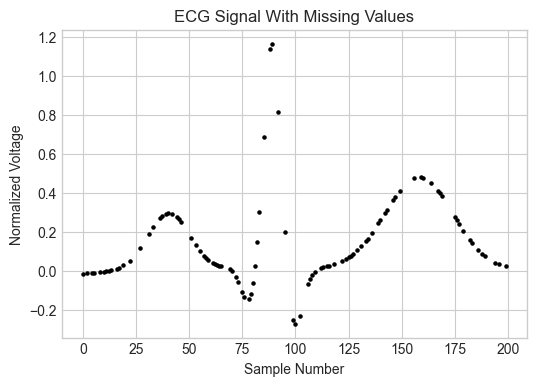

In [3]:
## Load data
FILE = DATA_DIR + 'ecg_missing.txt'
df_ecg = pd.read_csv(FILE, header = None, names = ['ecgvalues'])
df_ecg['ecgvalues'] = df_ecg['ecgvalues'].astype(float)

## Component plot of the ecg signal
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
component_index = range(0, len(df_ecg['ecgvalues']))
ax.scatter(component_index, df_ecg['ecgvalues'], color = 'black', marker = 'o', s = 5)
ax.set_xlabel('Sample Number')
ax.set_ylabel('Normalized Voltage')
ax.set_title('ECG Signal With Missing Values');

**Problem-1.1**: extract the indices corresponding to the missing ECG values

In [6]:
indices_unknown = df_ecg[df_ecg['ecgvalues'].isna()].index

**Problem-1.2**: extract the indices corresponding to the known ECG values

In [7]:
indices_known = df_ecg[df_ecg['ecgvalues'].notna()].index

**Problem-1.3**: build a vector of known ecg signal values

In [10]:
x_known = df_ecg.loc[indices_known, 'ecgvalues'].values
x_known

array([-1.4374358e-02, -1.2637355e-02, -1.0812403e-02, -9.8533655e-03,
       -6.5482859e-03, -3.7513235e-03, -2.0578644e-03, -9.4258541e-05,
        2.2061528e-03,  1.1933259e-02,  1.6432082e-02,  2.7900408e-02,
        5.2836413e-02,  1.1955439e-01,  1.8927629e-01,  2.2432987e-01,
        2.6819605e-01,  2.7884396e-01,  2.9247613e-01,  2.9511999e-01,
        2.9169886e-01,  2.7691699e-01,  2.6566740e-01,  2.5236573e-01,
        1.6913212e-01,  1.3481272e-01,  1.0374964e-01,  7.7566183e-02,
        6.6488692e-02,  5.6786325e-02,  4.1356533e-02,  3.5450843e-02,
        3.0563746e-02,  2.6503058e-02,  2.3035374e-02,  7.1758438e-03,
       -1.8258006e-03, -3.2324290e-02, -5.4580566e-02, -1.0887994e-01,
       -1.3214744e-01, -1.4281210e-01, -1.1800725e-01, -6.4454915e-02,
        2.2472551e-02,  1.4558586e-01,  3.0343132e-01,  6.8578156e-01,
        1.1362935e+00,  1.1638875e+00,  8.1561486e-01,  2.0040482e-01,
       -2.4972163e-01, -2.6991059e-01, -2.3291409e-01, -6.9188851e-02,
      

**Probem-1.4**: construct the matrices $S_1$ and $S_2.$

In [13]:
I = np.eye(len(df_ecg))
S1 = I[indices_known, :]
S2 = I[indices_unknown, :]

**Problem-1.5**: build the matrix $D$

In [15]:
n = len(df_ecg) # size of the signal
a = 1*np.ones(n-1)
b = 0
D = np.diag(a, -1) + np.diag(-2 * np.ones(n)) + np.diag(a, 1)
D = D[indices_known][:, indices_known]
D

array([[-2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., -2.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -2.]])

Reconstruct the missing values such that the resulting ECG signal is smooth (we will do this part during the lab session).

**Problem-2**: consider an $n$-vector $x$ of time series values. The following code snippet simulates such as vector. Try three different cycle frequency values (0.5, 1.0, 2.0) in the variable f below and observe what happens to the component plot of the vector.

Text(0.5, 1.0, 'Time series data')

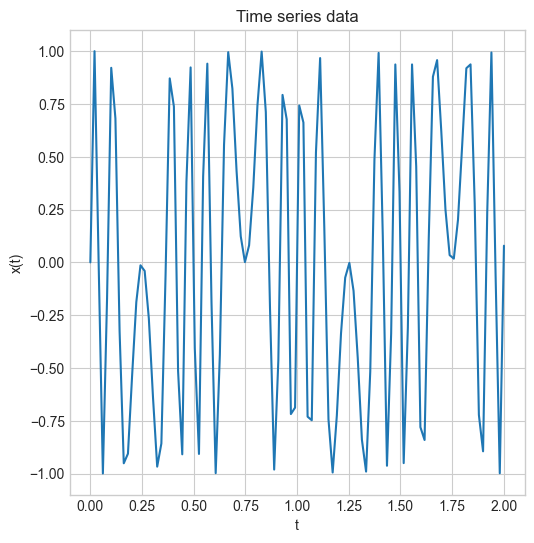

In [19]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f = 2.0  # cycle frequency
omega = 2 * np.pi * f # angular frequency
x = np.sin(omega*np.sin(0.5*omega*t))
fig, ax2 = plt.subplots(1, 1, figsize = (6, 6))
fig.tight_layout(pad = 4.0)
ax2.plot(t, x,)
ax2.set_xlabel('t')
ax2.set_ylabel('x(t)')
ax2.set_title('Time series data')

**Interpretation:** Higher the value of frequency value f, more is the number of curves in the graph.

**Problem 2.1**: In order to measure how rough or wiggly a signal represented by a vector is, we measure the so called *Dirichlet energy* of the signal which for the vector $x$ we saw above is defined as:

$$(x_2-x_1)^2+(x_3-x_2)^2+\cdots+(x_{100}-x_{99})^2.$$

Calculate the Dirichlet energy of the vector $x$ for the three different frequency values mentioned above. How do the values compare to each other?

Use the following clue:

Dirichlet energy of $x = \lVert Dx\lVert_2^2,$ where $D$ is the matrix $$\begin{bmatrix}-1 & ? & ? &\cdots&?&?\\0 & ? & 1 &\cdots&?&?\\? & ? & ? &\cdots&?&?\\ &  & \vdots &\vdots&&\\? & ? & ? &\cdots&-1&?\end{bmatrix}.$$

In [25]:
t_start = 0 # start time in sec
t_end = 2 # end time in sec
t = np.linspace(t_start, t_end+1e-03, 100) # timestamps
f = [0.5, 1.0, 2.0]  # cycle frequency
#omega = 2 * np.pi * f # angular frequency
x = np.sin(omega*np.sin(0.5*omega*t))
n = 100

dirichlet_energies = []

for freq in f:
    omega = 2 * np.pi * f
    
    # Generate the signal x for the current frequency
    x = np.sin(omega * np.sin(0.5 * omega * t))
    
    # Construct the D matrix
    n = len(x)
    D = np.diag(-1 * np.ones(n - 1), k=-1) + np.diag(np.ones(n - 1), k=1)
    
    # Calculate the Dirichlet energy
    energy = np.linalg.norm(np.dot(D, x)) ** 2
    dirichlet_energies.append(energy)

# Print the Dirichlet energies for different frequencies
for i, freq in enumerate(f):
    print(f"Dirichlet Energy (Frequency {f}): {dirichlet_energies[i]}")

TypeError: can't multiply sequence by non-int of type 'float'